In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to include a channel dimension
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

# Convert labels to categorical format (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Verify the shapes
print(f"x_train shape: {x_train.shape}")  # Should be (60000, 28, 28, 1)
print(f"y_train shape: {y_train.shape}")  # Should be (60000, 10)
print(f"x_test shape: {x_test.shape}")    # Should be (10000, 28, 28, 1)
print(f"y_test shape: {y_test.shape}")    # Should be (10000, 10)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [5]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=128)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8095 - loss: 0.6077 - val_accuracy: 0.9824 - val_loss: 0.0569
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9719 - loss: 0.0944 - val_accuracy: 0.9877 - val_loss: 0.0384
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9808 - loss: 0.0672 - val_accuracy: 0.9890 - val_loss: 0.0328


# Saving the Model

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
model.save('/content/drive/MyDrive/Emtech Final Project/number_detection_model.h5')

In [9]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/MyDrive/Emtech Final Project/number_detection_model.h5'

loaded_model = load_model(model_path)

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


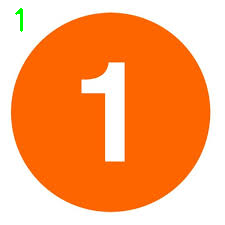

In [11]:
image_path = '/content/drive/MyDrive/Emtech Final Project/test2.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(gray, (28, 28))
normalized_image = resized_image.astype('float32') / 255.0


roi = np.expand_dims(normalized_image, axis=-1)
roi = np.expand_dims(roi, axis=0)
prediction = loaded_model.predict(roi)


predicted_label = np.argmax(prediction)


cv2.putText(image, str(predicted_label), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
cv2_imshow(image)

In [12]:
!pip install streamlit

In [13]:
!pip install --upgrade tensorflow

In [14]:
%%writefile app.py

Overwriting app.py


In [15]:
!wget -q -O - ipv4.icanhazip.com

34.31.175.246


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.31.175.246:8501

npx: installed 22 in 2.101s
your url is: https://cool-flies-begin.loca.lt
2024-05-18 07:32:04.927312: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-18 07:32:06.534668: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
